In [23]:
import pandas  as pd
import matplotlib.pyplot as plt


In [24]:
audio_df = pd.read_csv('audio_packets.csv')
video_df = pd.read_csv('video_packets.csv')
total_df = pd.read_csv('Total.csv')


In [25]:
video_df['interval'] = (video_df['Time'] // 0.05) * 0.05
audio_df['interval'] = (audio_df['Time'] // 0.05) * 0.05
total_df['interval'] = (total_df['Time'] // 0.05) * 0.05

In [ ]:
video_df['interval'] = (video_df['Time'] // 0.1) * 0.1
audio_df['interval'] = (audio_df['Time'] // 0.1) * 0.1
total_df['interval'] = (total_df['Time'] // 0.1) * 0.1

In [ ]:
video_df['interval'] = (video_df['Time'] // 0.5) * 0.5
audio_df['interval'] = (audio_df['Time'] // 0.5) * 0.5
total_df['interval'] = (total_df['Time'] // 0.5) * 0.5

In [26]:
video_resampled = video_df.groupby('interval').sum()['Length']
audio_resampled = audio_df.groupby('interval').sum()['Length']
total_resampled = total_df.groupby('interval').sum()['Length']

In [27]:
video_utilization = (video_resampled / total_resampled) * 100
audio_utilization = (audio_resampled / total_resampled) * 100

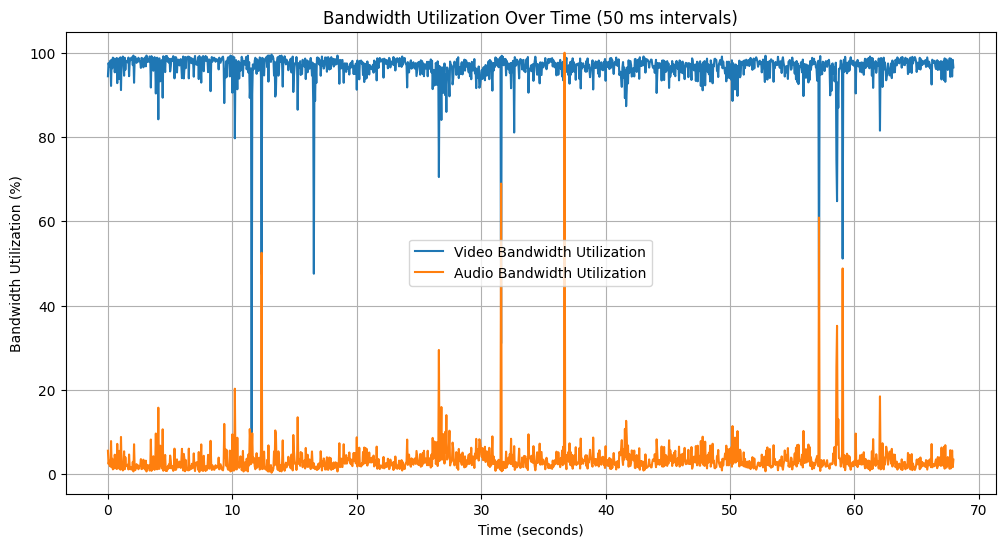

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(video_utilization.index, video_utilization.values, label='Video Bandwidth Utilization')
plt.plot(audio_utilization.index, audio_utilization.values, label='Audio Bandwidth Utilization')
plt.xlabel('Time (seconds)')
plt.ylabel('Bandwidth Utilization (%)')
plt.title('Bandwidth Utilization Over Time (50 ms intervals)')
plt.legend()
plt.grid(True)
plt.show()